In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from lxml import html
import requests
import json 
from bs4 import BeautifulSoup
import json 
from scipy import stats
from statistics import mean 
import plotly.express as px
import plotly.express as px



In [8]:
final=pd.read_csv('./dataset/final.csv')

## Dependent vs Independent Variables

### Movie Score vs Number of Ratings 

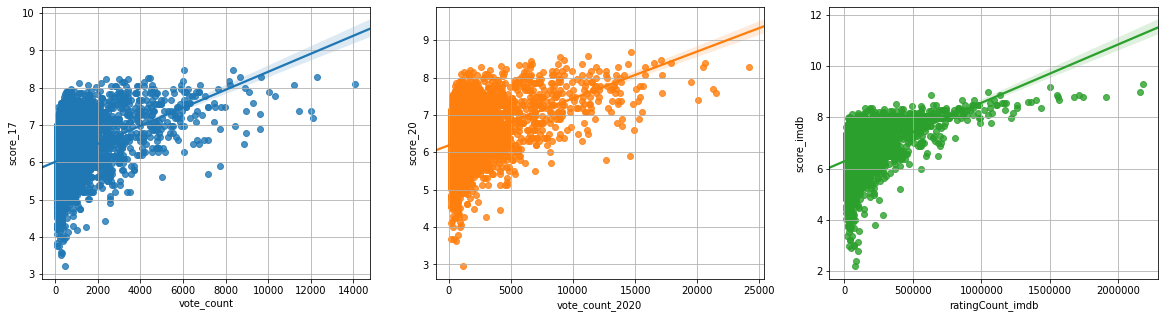

In [9]:
fig, ax =plt.subplots(1,3, figsize=(20,5))
sns.regplot(x="vote_count", y="score_17", data=final, ax=ax[0])
sns.regplot(x="vote_count_2020", y="score_20", data=final, ax=ax[1])
sns.regplot(x="ratingCount_imdb", y="score_imdb", data=final, ax=ax[2])
ax[0].grid(True);ax[1].grid(True);ax[2].grid(True)


We present three different scatterplots. The first one (blue) is the movie score in TMDb (2017) related to the number of notes (vote_count). The second one (orange) is the movie score in TMDb (2020) related to the vote count and the third (green) is the IMDb score related to the IMDb rating count.

All three are quite similar. They practically reveal the same tendency and the same conclusion can be extracted. The higher rating a movie has accumulated the more people have seen it and voted positively for it.

### Movie Score vs Rutime 

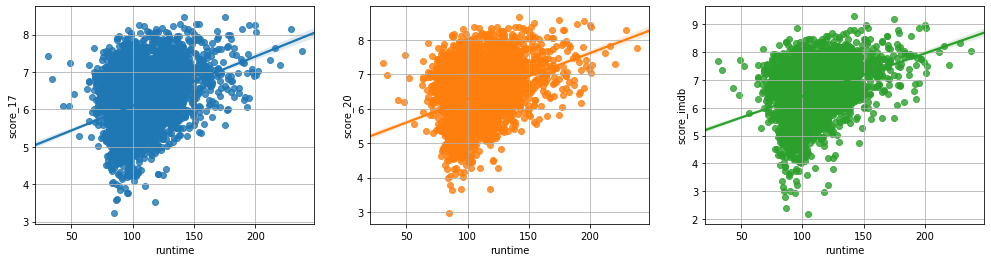

In [10]:
runtime=final[final['runtime']>30]
fig, ax = plt.subplots(1,3, figsize=(17,4))
sns.regplot(x="runtime", y="score_17", data=runtime, ax=ax[0])
sns.regplot(x="runtime", y="score_20", data=runtime, ax=ax[1])
sns.regplot(x="runtime", y="score_imdb", data=runtime, ax=ax[2])
# plt.ylabel('runtime')
ax[0].grid(True);ax[1].grid(True);ax[2].grid(True)


We present three different scatterplots. The first one (blue) is the movie score in TMDb (2017) related to the runtime. The second one (orange) is the movie score in TMDb (2020) related to the runtime and the third (green) is the IMDb score related to the runtime.

All three are similar (as expected). Most movies last between 60 and 120 minutes. As can be seen, movies at the extremes (either very short or very long duration) receive high scores and ratings.


### Movie Score vs Budget 

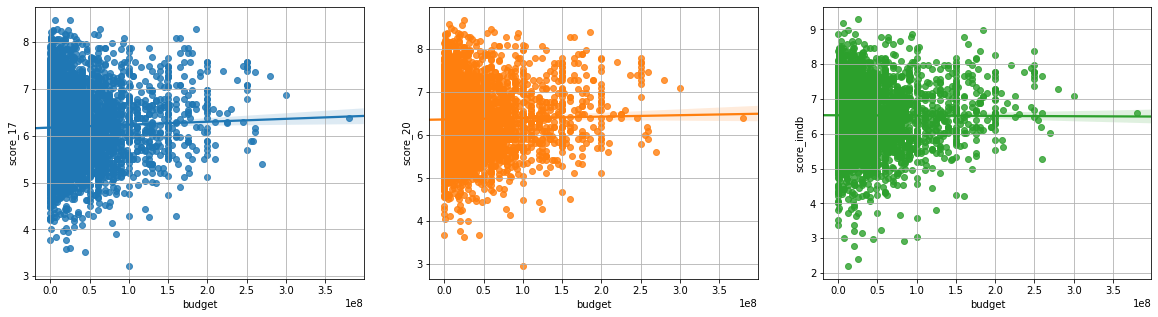

In [11]:
budget=final
budget['budget'] = budget['budget'].apply(np.int64)
budget=budget.sort_values('budget', ascending=True)
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.regplot(x="budget", y="score_17", data=budget, ax=ax[0])
sns.regplot(x="budget", y="score_20", data=budget, ax=ax[1])
sns.regplot(x="budget", y="score_imdb", data=budget, ax=ax[2])
ax[2].grid(True);ax[0].grid(True);ax[1].grid(True)

We present three different scatterplots. The first one (blue) is the movie score in TMDb (2017) related to the budget. The second one (orange) is the movie score in TMDb (2020) related to the budget and the third (green) is the IMDb score related to the budget.

There cannot be made any claim about the relation between budget and the score of a movie.

### Movie Score vs Revenue 

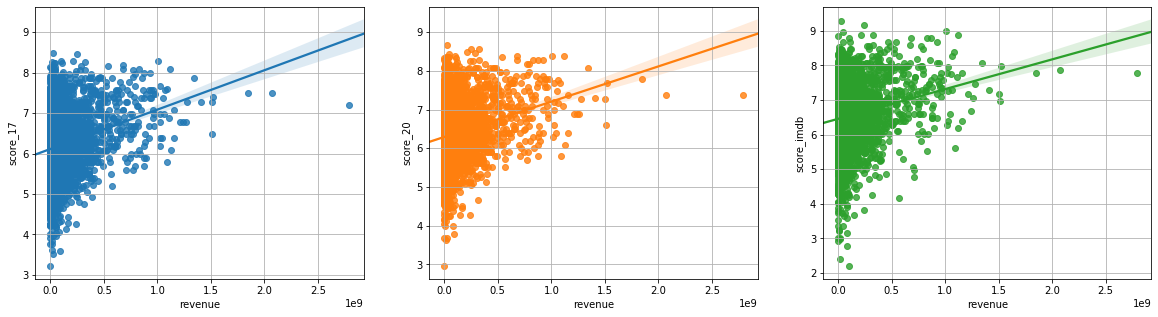

In [12]:
revenue=final
revenue['revenue'] = revenue['revenue'].apply(np.int64)
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.regplot(x="revenue", y="score_17", data=revenue, ax=ax[0])
sns.regplot(x="revenue", y="score_20", data=revenue, ax=ax[1])
sns.regplot(x="revenue", y="score_imdb", data=revenue, ax=ax[2])
ax[2].grid(True);ax[0].grid(True);ax[1].grid(True)

We present three different scatterplots. The first one (blue) is the movie score in TMDb (2017) related to the revenue. The second one (orange) is the movie score in TMDb (2020) related to the revenue and the third (green) is the IMDb score related to the revenue.

There seems to be that movies with huge revenues acquire high scores and rating which was expected. Popular movies (create the most revenue) are considered to be really good from the public and are rated accordingly.


### Movie Score vs Year of release

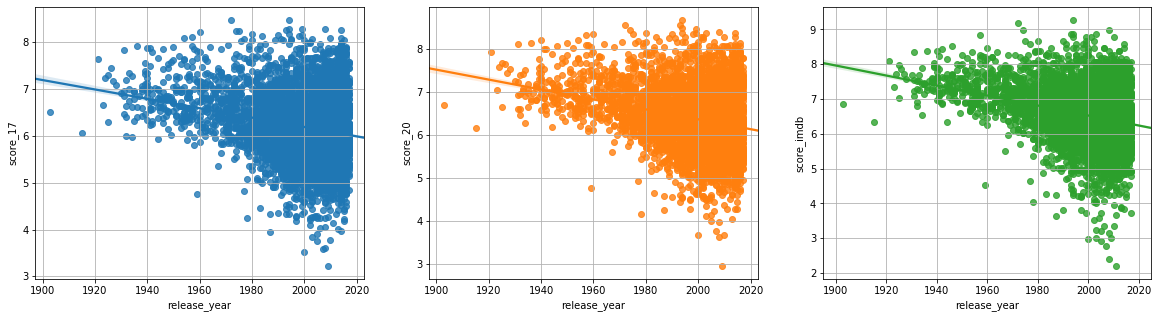

In [13]:
fig,ax = plt.subplots(1,3,figsize=(20,5))
sns.regplot(x="release_year", y="score_17", data=final, ax=ax[0])
sns.regplot(x="release_year", y="score_20", data=final, ax=ax[1])
sns.regplot(x="release_year", y="score_imdb", data=final, ax=ax[2])
ax[2].grid(True);ax[0].grid(True);ax[1].grid(True)

From the above scatter plots, we can conclude that older movies are more prone to receive relatively high scores (from 6 to 9). Wheareas, most recent movies have a wider range of scores (from 2 up to 9).

### Rating vs Genre

In [20]:
# dataframe with movies indexes per genre
genres_=pd.DataFrame(columns=['genre','indexes','ratings'])
genres_['ratings']=np.nan
genres_=genres_.set_index('genre')
exists=first_time=0

ls=[]
for index,i in final.iterrows():
    g=final.loc[index,'gernres_imdb']
    r=float(final.loc[index,'score_imdb'])
    if (g!=np.nan and g!="" and isinstance(g, str) ):
        if "[" in g:
            k=g[1:]
            k=k[:-1]
            g= k.replace(" ", "").replace("'", "").split(",")
            ls.append(g)
            for g_ in g:
                if g_ in genres_.index.values :
                    exists=exists+1
                    genres_.loc[g_,'indexes'].append(index)
                    if str(r)!='nan':
                        genres_.loc[g_,'ratings'].append(r)
                else:
                    first_time=first_time+1
                    k1=[index]
                    k2=[r]
                    genres_.loc[g_] = [k1,k2]
                    if str(r)!='nan':
                        genres_.loc[g_] = [k1,k2]
                    else:
                        genres_.loc[g_] = [k1,]
                        print (genres_.loc[g_])
        else:
            g= g.replace(" ", "")
            g= g.replace("'", "")
            if g in genres_.index.values : 
                exists=exists+1
                genres_.loc[g,'indexes'].append(index)
                if str(r)!='nan': genres_.loc[g,'ratings'].append(r)
                
            else:
                first_time=first_time+1
                k1=[index]
                k2=[r]
                if str(r)!='nan':  genres_.loc[g] = [k1,k2]
                else:  genres_.loc[g] = [k1,]
    

In [21]:
genres_.head()

,indexes,ratings
genre,,
Drama,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13, 14, 15...","[9.28432711895008, 9.178033163539174, 8.985736..."
Crime,"[1, 2, 4, 7, 12, 13, 15, 22, 23, 26, 27, 30, 3...","[9.178033163539174, 8.985736994786869, 8.88264..."
Action,"[2, 11, 17, 21, 49, 50, 58, 60, 66, 90, 116, 1...","[8.985736994786869, 8.674946659030418, 8.78501..."
Thriller,"[2, 9, 17, 18, 22, 23, 24, 26, 27, 28, 36, 39,...","[8.985736994786869, 8.455420553704112, 8.78501..."
Biography,"[5, 13, 31, 36, 45, 51, 67, 73, 93, 94, 96, 98...","[8.873967028061845, 8.671089917866073, 8.46272..."


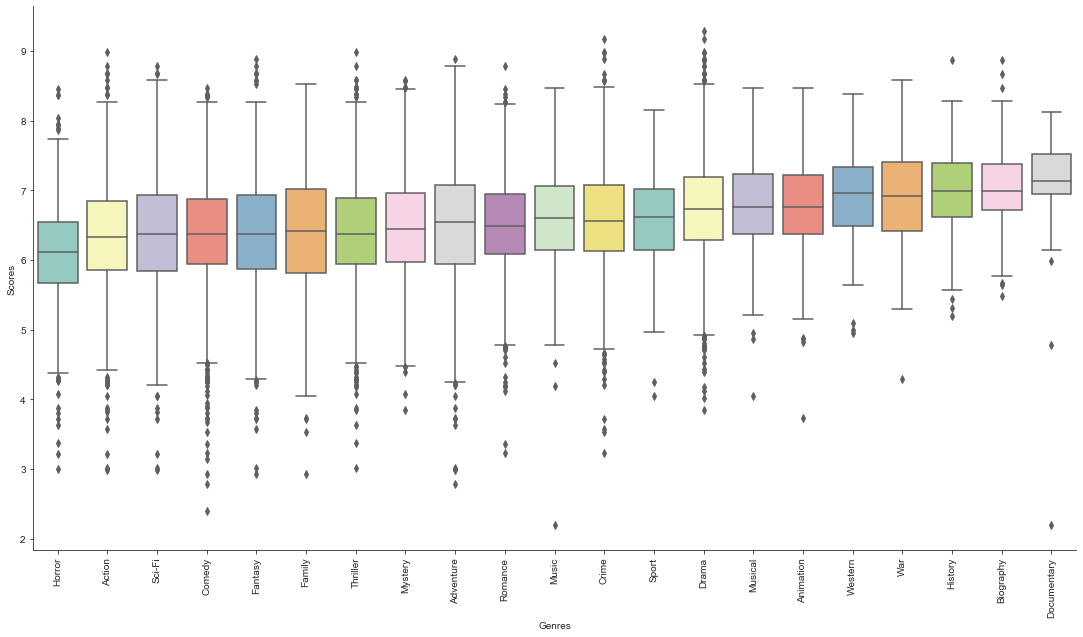

In [28]:
genres_=genres_.reset_index()
result = pd.DataFrame([(d, tup.genre) for tup in genres_.itertuples() for d in tup.ratings])
result.columns = [ 'Scores','Genres']
# sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 10)
sns.boxplot(x="Genres", y="Scores", data=result, palette="Set3", order = result.groupby(["Genres"]).mean().sort_values(by=['Scores']).head(21).index.values)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()

As we can infer from the above boxplot, horror films tend to be rated lower than the rest genres. History, Biography and Documentaries genres tend to be rated the highest. However, the differences in scores per genre are very small.

# Score change from 2017 until 2020 based on the decade that the movie was released

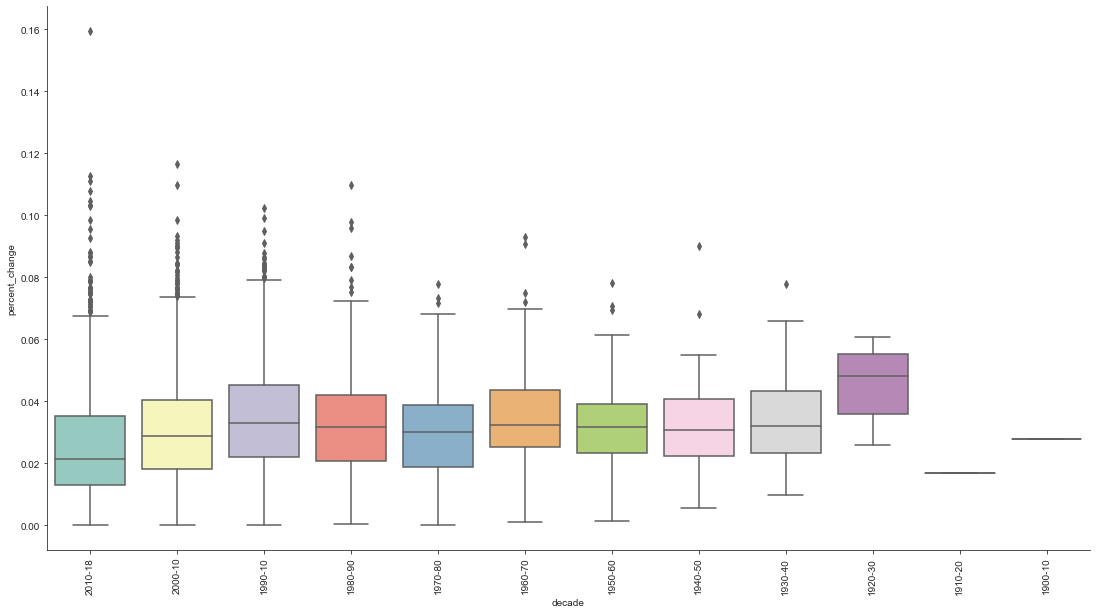

In [29]:
# calculate percent change of the rating 
final['percent_change']=abs(final['score_20']-final['score_17'])/final['score_17']
final['difference']=final['score_20']-final['score_17']
final['up_down']=[ 1 if i>0 else 0 for i in final['difference']  ]
final=final.sort_values('decade', ascending=False)
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(18.7, 10)
sns.boxplot(x="decade", y="percent_change", data=final, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.despine()

As we can see from the boxplot, the older a movie the higher the percentage of change in scores.

# Conclusions 

The dataset, as it was finally formulated (web scraping), provides possible variables that may affect a movie’s received rating/score, which actually reflects the public’s views about the movie.
Our objective was to manipulate the data so that we acquire a strong intuition about which of the features presented actually relate to a movie’s received rating/score and in what fashion.
Initially, the fair assumption was made that, since there are roughly more votes per movie provided by the IMDb platform, the data derived from their website would be more indicative in terms of how the ratings are formulated and by what set of variables are affected. 
After the analysis was conducted, we can conclude that there is not much of a deviation between the conclusions derived from TMDb data and the ones provided from data extracted from the  IMDb website.

* __Budget:__ a significant percentage of the movies’ budget  present in the dataset was close to zero (25%), that is why we excluded all movies with a budget less than 10,000 dollars (for reasons of completeness). 
It seems that the movie’s rating is almost uniform in relation to the budget even though someone can reasonably make the claim that movies with a budget higher than 2 million dollars will most likely receive an above average rating (more than 5/10).


* __Revenue:__ what intuition entails, that movies that accumulated high revenue are the most popular ones and receive the highest ratings, is extracted by the analysis.


* __Genre:__ Horror films tend to receive on average lower scores than the rest of genres. History, Biography and Documentary genres tend to achieve the highest ratings. For those three categories, there are not many movies available and the number of people who rated those kinds of movies is not that high. Those categories may have higher score for 2 reasons: 

    1) They appeal to specific audience groups, that possess a particular preference for these kind of movies
    
    2) Given that these genres are relatively rare, it is safe to assume that the reduced productivity is related to the strenuous constraints in terms of quality for those categories of films 
    
    
* __Production Countries:__ The vast majority of movies were produced in the US (90%), which makes it difficult to extract any solid conclusion about the way that the country of production affects the movie’s received rating.


* __Year of Release:__ The score was calculated only for movies that received more than a specific number of votes. As a consequence, older movies that are rated by many people tend to have higher score. However, we cannot infer any safe conclusions for more recent movies since they tend to receive  a wider range of scores [2,9].


* __Number of Votes:__ The higher the rating received, the higher the score, as expected by the formula (linear relation).


# Continue 3rd Part ----> 